In [1]:
print("Hello World")

Hello World


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\anaconda\lib\site-packages (2.20.0)



In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
print(tf.__version__)

c:\Anaconda\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


2.20.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data =pd.read_csv(r'D:\DEEP_LEARING\Saved_Dataset\Churn_Modelling_dataset.csv')

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=data

### **1.Handle Missing Values**

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df.drop(labels=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [17]:
df.shape

(10000, 11)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [20]:
df.select_dtypes(include="object").columns

Index(['Geography', 'Gender'], dtype='object')

In [21]:
numericcol=df.select_dtypes(exclude="object").columns

In [22]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

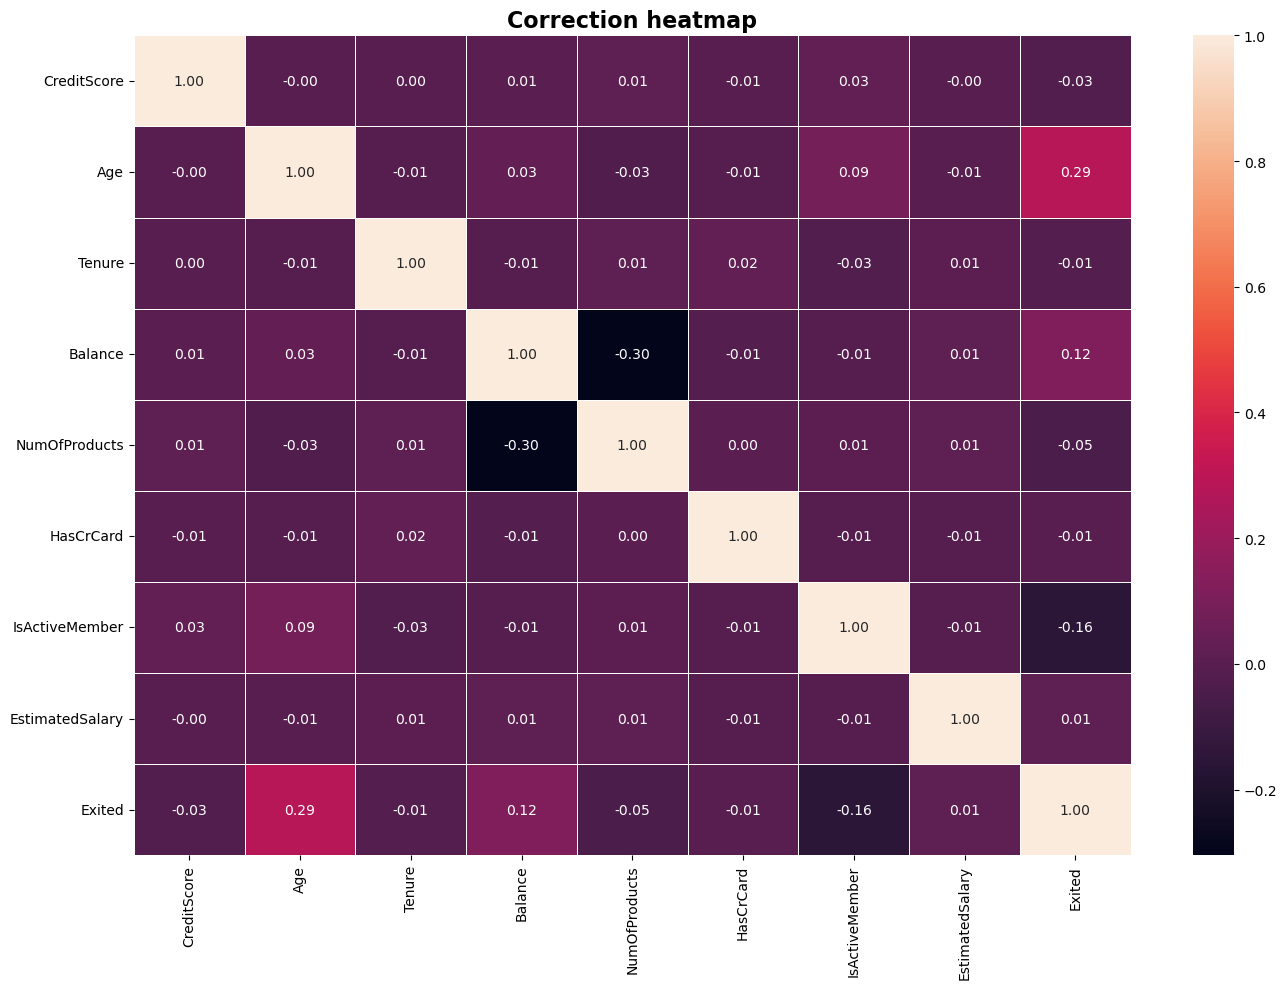

In [26]:
plt.figure(figsize=(14,10))
corr_matix=df[numericcol].corr()
sns.heatmap(
corr_matix,
annot=True,
fmt=".2f",
linewidths=0.5,
)
plt.title("Correction heatmap",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.show()

In [27]:
# target values
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [28]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
categoricalcol=x.select_dtypes(include="object").columns
numericcol=x.select_dtypes(exclude="object").columns

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#pipline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [33]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [34]:
geo_cat = ['Female', 'Male']
gender_cat = ['France', 'Spain', 'Germany']

In [35]:
# Creating pipelines for numerical and categorical features
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
               # Standardize numerical data
               # Helps the models learn faster and better

# Pipeline for categorical features
cat_pipeline = Pipeline(steps=[('ordinalencoder', OrdinalEncoder(categories=[gender_cat, geo_cat]))])
               # Convert categorical values into numbers

# Combine numerical and categorical pipelines

preprocessor = ColumnTransformer(
                    [("num_pipeline", num_pipeline, numericcol),      # Apply numerical pipeline to numerical columns
                     ("cat_pipeline", cat_pipeline, categoricalcol)]    # Apply categorical pipeline to categorical columns
                )

In [36]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [37]:
x_train.shape

(8000, 10)

In [38]:
y_train.shape

(8000,)

In [39]:
x_train.shape

(8000, 10)

In [40]:
x_test.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [41]:
# Applying the preprocessing pipelines to the training and testing data
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns= preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns= preprocessor.get_feature_names_out())

In [42]:
x_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [43]:
x_train.tail()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
7995,1.207474,1.435808,1.039728,-0.102301,-0.916688,0.649203,0.974817,-0.539860,0.0,1.0
7996,0.314989,1.816097,-1.389442,-1.218471,-0.916688,0.649203,0.974817,-1.733882,0.0,0.0
7997,0.865009,-0.085351,-1.389442,-1.218471,2.533560,-1.540351,-1.025834,-0.142765,0.0,0.0
7998,0.159323,0.390011,1.039728,1.827259,-0.916688,0.649203,-1.025834,-0.050826,0.0,1.0
7999,0.470655,1.150590,-1.389442,1.149720,-0.916688,0.649203,0.974817,-0.814568,2.0,1.0


In [44]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_pipeline__CreditScore      8000 non-null   float64
 1   num_pipeline__Age              8000 non-null   float64
 2   num_pipeline__Tenure           8000 non-null   float64
 3   num_pipeline__Balance          8000 non-null   float64
 4   num_pipeline__NumOfProducts    8000 non-null   float64
 5   num_pipeline__HasCrCard        8000 non-null   float64
 6   num_pipeline__IsActiveMember   8000 non-null   float64
 7   num_pipeline__EstimatedSalary  8000 non-null   float64
 8   cat_pipeline__Geography        8000 non-null   float64
 9   cat_pipeline__Gender           8000 non-null   float64
dtypes: float64(10)
memory usage: 625.1 KB


In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_pipeline__CreditScore      2000 non-null   float64
 1   num_pipeline__Age              2000 non-null   float64
 2   num_pipeline__Tenure           2000 non-null   float64
 3   num_pipeline__Balance          2000 non-null   float64
 4   num_pipeline__NumOfProducts    2000 non-null   float64
 5   num_pipeline__HasCrCard        2000 non-null   float64
 6   num_pipeline__IsActiveMember   2000 non-null   float64
 7   num_pipeline__EstimatedSalary  2000 non-null   float64
 8   cat_pipeline__Geography        2000 non-null   float64
 9   cat_pipeline__Gender           2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


## WE PERFORMED ALL PROCESS FOR DATA CLEANING ABOVE

FEATURE ENGINEERING

In [46]:
import pickle
with open ("Saved_Model/preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

## ANN IMPLEMENTATION

In [47]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [49]:
x_train.shape[1]# we convert dimension for architecture

10

In [50]:
(x_train.shape[1], )

(10,)

In [51]:
model  = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1], )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.001)


In [54]:
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

## MODEL TRAIN

In [55]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)

## TO SAVE THE MODEL INFO

In [56]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [57]:
x_train.dtypes

num_pipeline__CreditScore        float64
num_pipeline__Age                float64
num_pipeline__Tenure             float64
num_pipeline__Balance            float64
num_pipeline__NumOfProducts      float64
num_pipeline__HasCrCard          float64
num_pipeline__IsActiveMember     float64
num_pipeline__EstimatedSalary    float64
cat_pipeline__Geography          float64
cat_pipeline__Gender             float64
dtype: object

In [58]:
x_test.dtypes

num_pipeline__CreditScore        float64
num_pipeline__Age                float64
num_pipeline__Tenure             float64
num_pipeline__Balance            float64
num_pipeline__NumOfProducts      float64
num_pipeline__HasCrCard          float64
num_pipeline__IsActiveMember     float64
num_pipeline__EstimatedSalary    float64
cat_pipeline__Geography          float64
cat_pipeline__Gender             float64
dtype: object

In [59]:
history=model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8045 - loss: 0.4489 - val_accuracy: 0.8385 - val_loss: 0.3824
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3734 - val_accuracy: 0.8530 - val_loss: 0.3542
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.3555 - val_accuracy: 0.8605 - val_loss: 0.3468
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.3471 - val_accuracy: 0.8545 - val_loss: 0.3451
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3434 - val_accuracy: 0.8605 - val_loss: 0.3416
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8604 - loss: 0.3396 - val_accuracy: 0.8585 - val_loss: 0.3412
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3371 - val_accuracy: 0.8580 - val_loss: 0.3407
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3346 - val_accu

In [60]:
model.save(r"Saved_Model/model.h5")

In [61]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

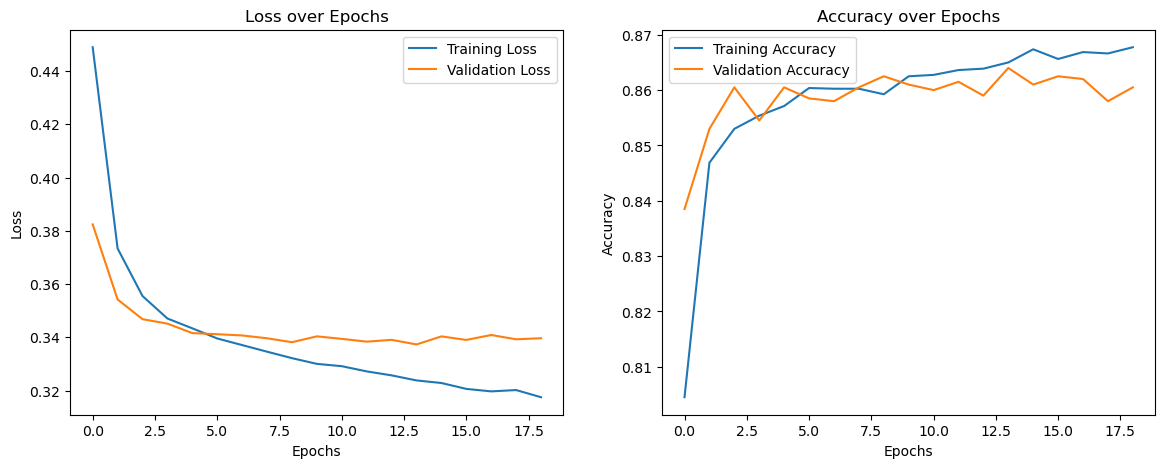

In [62]:
epochs = len(loss)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()